#                                Project: Titanic Survival Exploration 2 
## Cleaning data and building a decision tree.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier

## Carregando os dados e verificando o conteúdo.

In [2]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

In [3]:
# Verificando as dimensões dos data frames
print("Dimensoes da matriz de treino: ",df_train.shape)
print("Dimensoes da matriz de teste: ",df_test.shape)

Dimensoes da matriz de treino:  (891, 12)
Dimensoes da matriz de teste:  (418, 11)


In [4]:
# Aspecto da tabela de dados para treino
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


#### Identificando as colunas

* PassengerId: Número de identificação do passageiro;

* Survived: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;

* Pclass: Classe na qual o passageiro viajou. É informado 1 para primeira classe; 2 para segunda; e 3 para terceira;

* Name: Nome do passageiro;

* Sex: Sexo do passageiro;

* Age: Idade do passageiro em anos;

* SibSp: Quantidade de irmãos e cônjuges a bordo ;

* Parch: Quantidade de pais e filhos a bordo;

* Ticket: Número da passagem;

* Fare: Preço da passagem;

* Cabin: Número da cabine do passageiro;

* Embarked: Porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente.

In [5]:
# Aspecto dos dados da tabela para testes
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


### Verificando a relação entre o gênero e o número de sobreviventes.

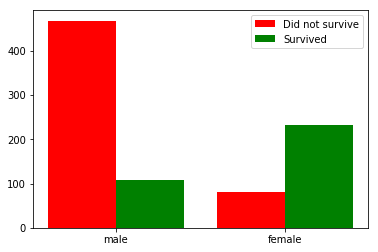

In [6]:
male = [0,0]; female = [0,0]; surv_bar = [0,0]
color_bar = ['r', 'g']; bar_pos = [-0.4,0.0,0.6,1.0]
bar_width = 0.4
for i in [0,1]:
    male[i] = (df_train[df_train['Survived'] == i]['Sex'] == 'male').sum()
    female[i] = (df_train[df_train['Survived'] == i]['Sex'] == 'female').sum()
    surv_bar[i] = plt.bar(bar_pos[i], male[i], width = bar_width, color = color_bar[i])
    plt.bar(bar_pos[i+2], female[i], width = bar_width, color = color_bar[i])
plt.xticks([-0.2,0.8], ['male', 'female'])  
plt.legend((surv_bar[0],surv_bar[1]),('Did not survive', 'Survived'), framealpha = 0.8);

Verificamos que a maioria dos sobreviventes foram mulheres. 

### Verificando a idade dos sobreviventes 

In [7]:
import matplotlib.style
import matplotlib as mpl

In [8]:
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rbgcmyk')

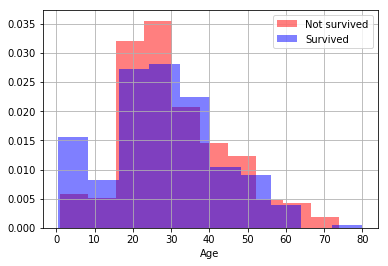

In [9]:
df_train.groupby('Survived').Age.hist(alpha=0.5, density = True)
plt.xlabel("Age")
plt.legend(["Not survived", "Survived"]);

## Removendo dados irrelevantes

Observa-se que nos dados de teste, apareceu valores NaN para 'Cabin'. Além de conter NaN nos testes, esta informação poderia sugerir que, conforme o número da cabine, o passageiro pode ser de primeira, segunda, ou terceira classe, o que permite especular que a primeira classe teria acesso fácil para sair do navio. No entanto, já existe uma coluna classificando o passageiro pela classe, tornado o número da cabine uma informação redundante.

Também é claro que o 'Name' e o número do 'Ticket' não exerceriam qualquer influência na pessoa se salvar do naufrágio.

Removemos estas três.

In [10]:
df_train.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df_test.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

## One-hot encoding

Na análise acima, observamos que o gênero foi importante para definir quem iria se salvar. Como esta variável é categórica, male e female, precisamos construir uma tabela binária para classificar cada um dos gêneros. A construção desta tabela binária chama-se *One-hot enconding*. 

In [11]:
train = pd.get_dummies(df_train)
test = pd.get_dummies(df_test)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.00,1,0,7.25,0,1,0,0,1
1,2,1,1,38.00,1,0,71.28,1,0,1,0,0
2,3,1,3,26.00,0,0,7.92,1,0,0,0,1
3,4,1,1,35.00,1,0,53.10,1,0,0,0,1
4,5,0,3,35.00,0,0,8.05,0,1,0,0,1


In [13]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50,0,0,7.83,0,1,0,1,0
1,893,3,47.00,1,0,7.00,1,0,0,0,1
2,894,2,62.00,0,0,9.69,0,1,0,1,0
3,895,3,27.00,0,0,8.66,0,1,0,0,1
4,896,3,22.00,1,1,12.29,1,0,0,0,1


## Tratando os missing numbers (NaN)

In [14]:
# Verificando o numero de missing numbers com .isnull()
train.isnull().sum().sort_values(ascending = False)

Age            177
Embarked_S       0
Embarked_Q       0
Embarked_C       0
Sex_male         0
Sex_female       0
Fare             0
Parch            0
SibSp            0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [15]:
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Parch           0
SibSp           0
Pclass          0
PassengerId     0
dtype: int64

In [16]:
# Preenchendo os valores nulos das idades com a media
train['Age'].fillna(train['Age'].mean(), inplace = True)
test['Age'].fillna(test['Age'].mean(), inplace = True)

In [17]:
test['Fare'].fillna(test['Fare'].mean(), inplace= True)

In [18]:
# Verificando a substituição
train.isnull().sum().sort_values(ascending = False)

Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Fare           0
Parch          0
SibSp          0
Age            0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [19]:
test.isnull().sum().sort_values(ascending = False)

Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Fare           0
Parch          0
SibSp          0
Age            0
Pclass         0
PassengerId    0
dtype: int64

## Classificador:  Machine Learning

### Separando os features e targets:

In [20]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

### Criando o modelo

In [21]:
# Definindo os parâmetros para o classificador
param = {} # Criando um dictionary para lista de parâmetros
param['max_depth'] = 3
param['random_state'] = 42 

clf = DecisionTreeClassifier(**param)

### Treinando o  modelo.

In [22]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [23]:
# Verificando o score dos dados de treino
clf.score(X,y)

0.8271604938271605

### Inferindo resultado com os dados de teste.


In [24]:
Inference = pd.DataFrame()
Inference['PassengerId'] = test['PassengerId']
Inference['Survived'] = clf.predict(test)

## Salvando os dados para submissão no Kaggle

In [26]:
Inference.to_csv('submission.csv', index=False)